# SALES PERFORMANCE ANALYSIS ACROSS TWELVE MONTHS 
_IKER SÁNCHEZ PALACIOS_

### NECESSARY LIBRARIES

In [21]:
import os 
import pandas as pd
from os import listdir
from os.path import isfile, join
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import warnings
warnings.filterwarnings('ignore');

### DATA CLEANSING

##### Task 1 
Merge the 12 csv files into a single readable format.  

In [2]:
files = [f for f in listdir('C:\\Users\\ASUS\\First_Data_Project\\Sales') if isfile(join('C:\\Users\\ASUS\\First_Data_Project\\Sales', f))] #This lists every file in directory
year_data = pd.DataFrame() #We create an empty dataframe to concat each dataframe


for f in files: #We concat each csv into one dataframe
  temp_csv = pd.read_csv("Sales/"+f)
  year_data = pd.concat([year_data, temp_csv])

year_data.head()
year_data.to_csv("year_data.csv", index = False)


##### Task 2
Work around NaN's.

In [3]:
nan_rows = year_data[year_data.isna().any(axis=1)] #This filters rows with nans
nan_rows.head(10);

In [4]:
yd_nonans = year_data.dropna(how='all') #Year data with no rows full of nans. (At least 1 value in 1 column will preserve the row)
year_data = yd_nonans
year_data.head();

##### Task 4
When trying to convert the month number into an integer, there was an error pointing out there was a string "Or" trying to be converted into an integer. We'll look for this string into our Order Date column.

In [7]:
or_filter = year_data.loc[year_data['Order Date'].str[0:2] == 'Or']
#print(or_filter) #Looks like the empty rows provoquing NaN's were the ones that separated each month from another

In [14]:
year_data = year_data.loc[year_data['Order Date'].str[0:2] != 'Or']  #We redefine our data with the rows that have no "Or" in column 'Month'
#print(year_data.head())
year_data.loc[year_data['Month']=='Or'].head(); #No weird Or's left

###### Task 5
Convert Quantity Ordered column into integers. Then convert Price each column into a float column.

In [12]:
year_data["Quantity Ordered"] = year_data["Quantity Ordered"].astype("int")
year_data["Price Each"] = year_data["Price Each"].astype("float")
year_data.head();

##  WHAT WAS THE BEST MONTH FOR SALES? HOW MUCH WAS EARNED THAT MONTH?

##### Best month for sales
According to the bar plot below, it appears that our data exhibits a plausible festive-related reason behind the month with the most sales. Nevertheless, April appears as a noticeable case in our data. A couple of reasons for this might be:

1. Increased investment in advertising during the month of April.
2. Christmas gifting trends during the December holidays.

We can also state that sales amounted to **_4,613,443 USD_** by the end of the **_December_**, marking it as the best month for sales.

##### Task 3: Based on the first question
Add a month column to the merged data

In [13]:
###### Task 3
year_data['Month'] = 0 #This created a column for the year_data dataframe filled with zeroes
#year_data.drop('month', axis=1, inplace=True) #This deleted a column from the dataframe
year_data.head();

In [15]:
#We now read from the order date to convert into month
#The format of the date is mm/dd/yy hh:mm. We can just grab the two first chars
year_data['Month'] = year_data["Order Date"].str[0:2]
year_data['Month'] = year_data['Month'].astype(int) #This tried to convert "04's" into "4's". Couldn't bc of NaN's (CUD was created)
year_data.head(); #After Tasks 4 and 5 being completed, this will run

##### Task 6: Based on the first question
Add a sales column defined as Quantity Ordered * Price Each.

In [16]:
#Task 6
year_data["Sales"] = year_data["Quantity Ordered"] * year_data["Price Each"]
year_data.head();


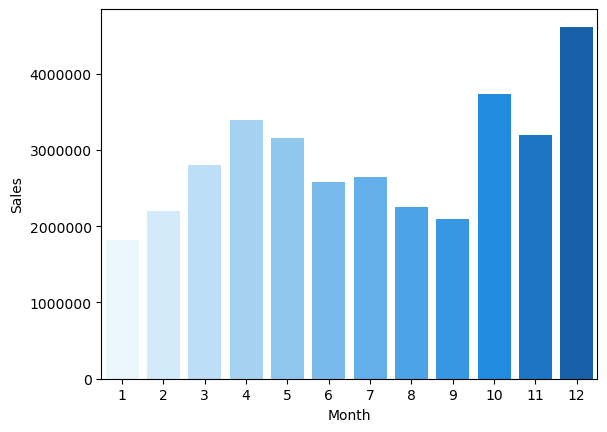

In [42]:
########################### Sales per month ###########################
results = year_data.groupby("Month", as_index = False).sum("Sales") #This is for operating usage
cols = [
    "#E6F7FF", "#CCEBFF", "#B3E0FF", "#99D4FF", "#80C9FF", "#66BDFF",
    "#4DB2FF", "#33A6FF", "#1A9BFF", "#008FFF", "#0078E0", "#0062C0"   
]
sns.barplot(results, x="Month", y="Sales", palette=cols)
plt.ticklabel_format(style='plain', axis='y')


In [43]:
################## How much was earned ################## 
results_display =  results #This is for visualizing data

def format_sales(number):
    return '{:,.0f}'.format(number) #This function will format the sales

results_display['Sales'] = results_display['Sales'].apply(format_sales) # We then apply our function to results_dis' Sales column
print(results_display[["Month", "Sales"]].to_string(index=False))# Mostrar el DataFrame con las ventas formateadas

 Month     Sales
     1 1,822,257
     2 2,202,022
     3 2,807,100
     4 3,390,670
     5 3,152,607
     6 2,577,802
     7 2,647,776
     8 2,244,468
     9 2,097,560
    10 3,736,727
    11 3,199,603
    12 4,613,443


##  WHAT CITY HAD THE HIGHEST NUMBER OF SALES?

##### City with the highest number of sales
San Francisco is the highest selling city. It might be related with the income within that city. A few hypothesis might be set.

##### Task 7: Based on the second question
Augment the dataframe with a _City_ column. Consider the state of each city, duplicates could be found with Portland city (Maine, Oregon).

In [17]:
#Task 7
year_data["City"] = year_data["Purchase Address"].str.split(',').str[1].str.strip() #.apply() method would've also helped

def get_city(ad):
    return ad.split(',')[1].strip()

def get_state(ad):
    return ad.split(' ')[-2]


year_data["City"] = year_data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
year_data.head();


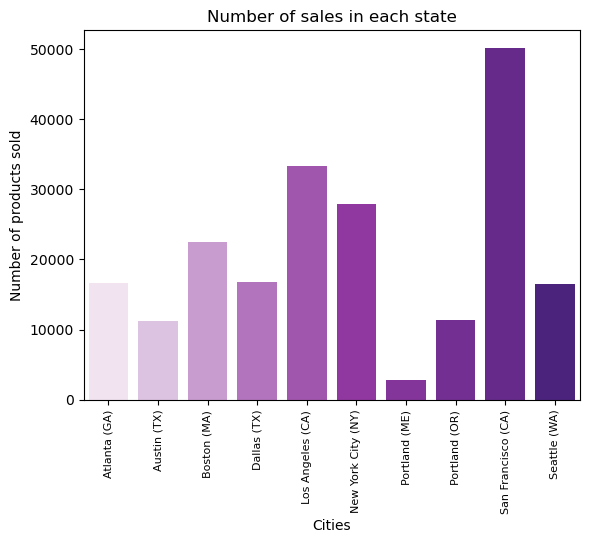

In [18]:
############ A Graphical Overview ##############
cities = year_data["City"].unique()
results = year_data.groupby("City", as_index=False).sum("Quantity Ordered")

purple_palette = [
    "#F4E1F2", "#E1BEE7", "#CE93D8", "#BA68C8", "#AB47BC",  # Light to medium purples
    "#9C27B0", "#8E24AA", "#7B1FA2", "#6A1B9A", "#4A148C"   # Medium to dark purples
]

sns.barplot(results, x = "City", y = "Quantity Ordered", palette= purple_palette)
plt.xticks(rotation=90)  # Rotate labels by 45 degrees
plt.xticks(fontsize=8)
plt.xlabel('Cities')
plt.ylabel('Number of products sold')
plt.title('Number of sales in each state')
plt.show()


In [45]:
############ Display of numbers ############


# Realizar la operación groupby() y sum()
results = year_data.groupby("City").sum("Quantity")

# Aplicar formato a la columna 'Quantity Ordered' del DataFrame 'results'
results['Quantity Ordered'] = results['Quantity Ordered'].apply(lambda x: '{:,.2f}'.format(x))

results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),"16,602.00",2779908.20,104794,2795498.58
Austin (TX),"11,153.00",1809873.61,69829,1819581.75
Boston (MA),"22,528.00",3637409.77,141112,3661642.01
Dallas (TX),"16,730.00",2752627.82,104620,2767975.40
Los Angeles (CA),"33,289.00",5421435.23,208325,5452570.80
New York City (NY),"27,932.00",4635370.83,175741,4664317.43
Portland (ME),"2,750.00",447189.25,17144,449758.27
Portland (OR),"11,303.00",1860558.22,70621,1870732.34
San Francisco (CA),"50,239.00",8211461.74,315520,8262203.91


##  WHAT TIME SHOULD THE ADVERTISEMENT BE DISPLAYED TO MAXIMIZE THE LIKELIHOOD OF COSTUMERS BUYING A PRODUCT? 

##### Hour that maximizes the likelihood of coustumers buying a product.
Considering a 24-hour format, two particular times stand out as the ones with the most sales: 12 p.m. and 7 p.m.
The graph below then suggests those two opportunity windows for the company to advertise their products.

##### Task 8: Based on the third question
We will augment our dataframe by adding two columns: one for the hour, another one for the minutes for each order time.

In [19]:
#Task 8
year_data["Order Date"] = pd.to_datetime(year_data["Order Date"])
year_data["Hour"] = year_data["Order Date"].dt.hour
year_data["Minute"] = year_data["Order Date"].dt.minute
year_data.head();

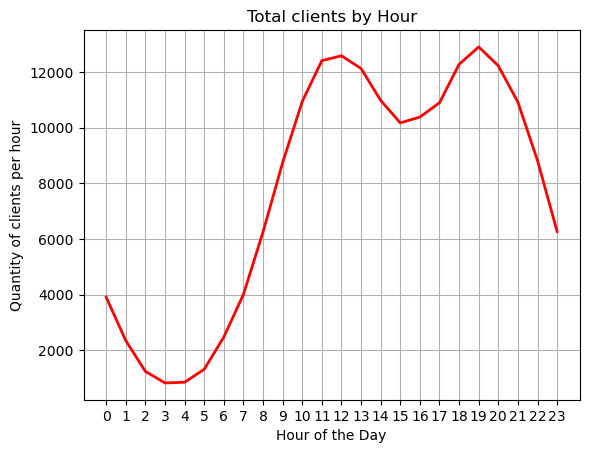

In [48]:
results = year_data.groupby("Hour", as_index=False).count()
sns.lineplot(results, x = results["Hour"], y = results["Product"], color = "red", linewidth=2)
plt.gca().set_xticks(results["Hour"])
plt.xlabel('Hour of the Day')
plt.ylabel('Quantity of clients per hour')
plt.title('Total clients by Hour')
plt.grid()
plt.show()

## WHAT PRODUCTS ARE MOST OFTEN SOLD TOGETHER?

##### Task 9: Based on the fourth question
We will create a dataframe that only shows, in order, the rows that have duplicate Order IDs

In [22]:
df = year_data[year_data["Order ID"].duplicated(keep = False)]
#df.head(20)
df['Grouped'] = df.groupby('Order ID')['Product']. transform(lambda x:', '.join(x) ) 
df= df[['Order ID', 'Grouped']].drop_duplicates()
df.head();


##### Answer

In [48]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(', ')
    count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## WHAT PRODUCT SOLD THE MOST? WHY?

##### Answer.
The most sold product seems to be the 4-pack of AAA batteries, with the 4 pack of AA batteries being a close second.
That being said, the LG Dryer is expensive, so the price might have something to do with the demand. The second plot exhibits a plausible correlation between expensive items and their low demand. 

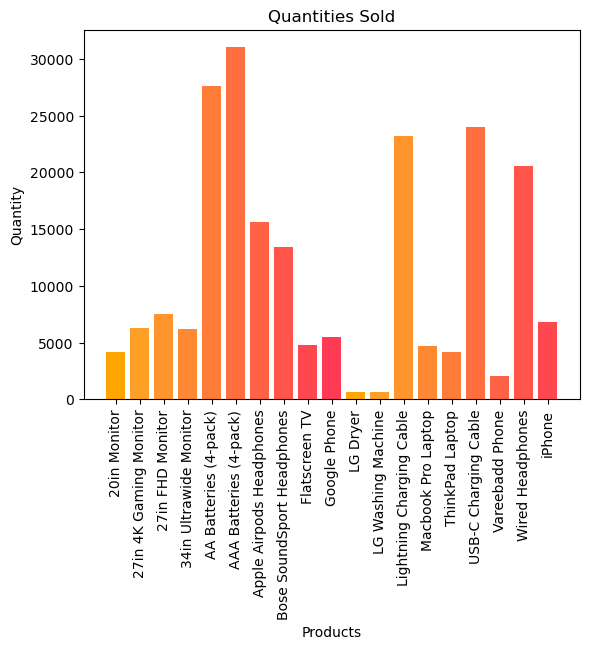

In [23]:
prods = year_data.groupby('Product')
products = [product for product, df in prods]
quantity_ordered = prods.sum()['Quantity Ordered']

degrading_orange_palette = [
    '#FFA500',  # Pure orange
    '#FFA026',  # Lighter shade of orange
    '#FF952C',
    '#FF8832',
    '#FF7B38',
    '#FF6E3E',
    '#FF6144',
    '#FF544A',
    '#FF474F',
    '#FF3A55'   # Darker shade of orange
]

plt.bar(products, quantity_ordered, color = degrading_orange_palette)
plt.xlabel('Products')
plt.ylabel('Quantity')
plt.title('Quantities Sold')
plt.xticks(rotation = 'vertical')
plt.show()

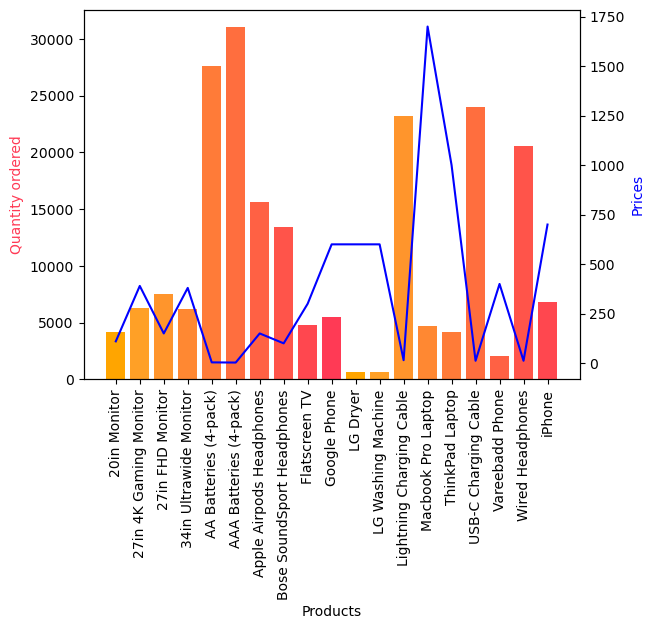

In [24]:
prods = year_data.groupby('Product')
products = [product for product, df in prods]
quantity_ordered = prods.sum()['Quantity Ordered']
prices = year_data.groupby('Product').mean()['Price Each']

degrading_orange_palette = [
    '#FFA500',  # Pure orange
    '#FFA026',  # Lighter shade of orange
    '#FF952C',
    '#FF8832',
    '#FF7B38',
    '#FF6E3E',
    '#FF6144',
    '#FF544A',
    '#FF474F',
    '#FF3A55'   # Darker shade of orange
]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = degrading_orange_palette)
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity ordered', color = '#FF3A55')
ax2.set_ylabel('Prices', color='b')
ax1.set_xticklabels(products, rotation = 'vertical')
plt.show()